In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("housing.csv")


In [9]:
##data size
print(df.shape)

(489, 4)


In [8]:
## preview of the data
print(df.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [10]:
## data description
print(df.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [11]:
## features selection
target = 'MEDV'
features =[col for col in df.columns if col!=target]

### check the features relations

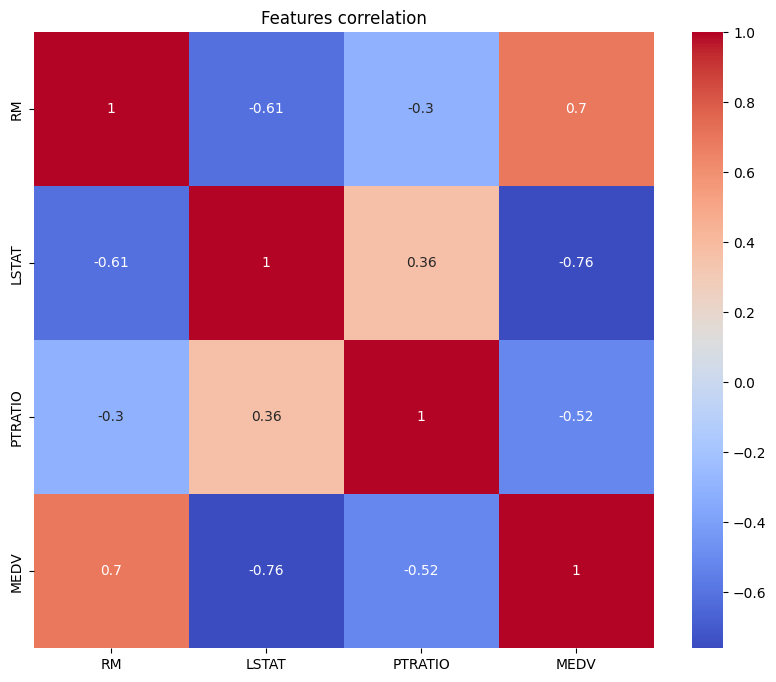

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + [target]].corr(), annot=True,cmap='coolwarm')
plt.title("Features correlation")
plt.show()

## visualize the relationship of some features

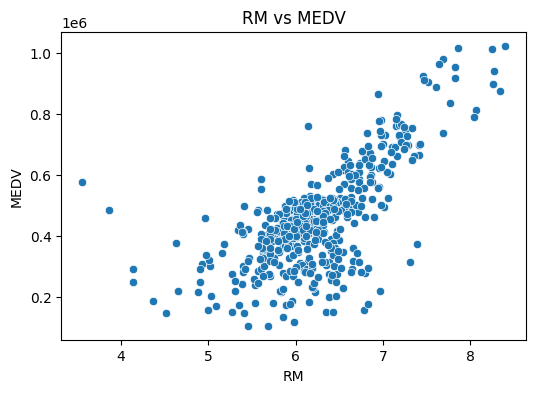

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x='RM', y=target)
plt.title("RM vs MEDV")
plt.show()

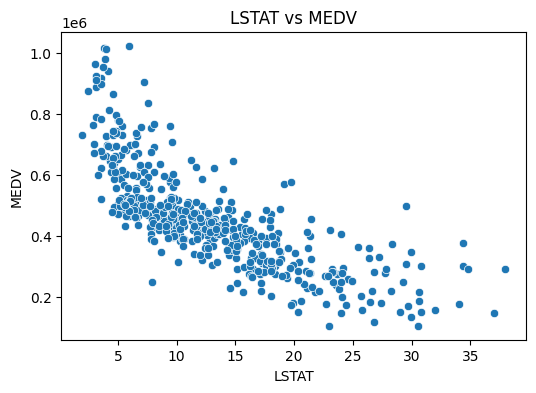

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x ='LSTAT', y = target)
plt.title("LSTAT vs MEDV")
plt.show()

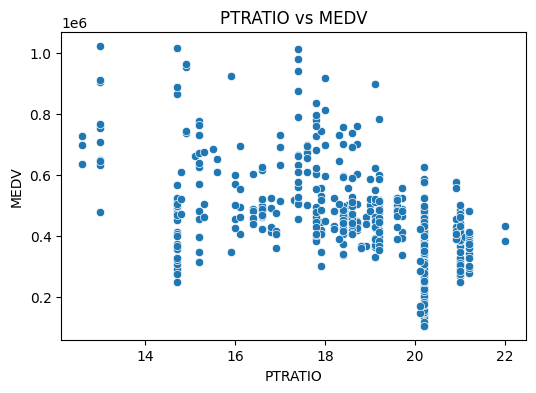

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data = df, x ='PTRATIO', y= target)
plt.title("PTRATIO vs MEDV")
plt.show()

## Preprocessing the data

In [17]:
scaler = StandardScaler()
X = df[features]
y = df[target]


In [18]:
## train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc_train = StandardScaler()
X_train_scaled = sc_train.fit_transform(X_train)
sc_test = StandardScaler()
X_test_scaled = sc_test.fit_transform(X_test)

## Build the Linear Regression Model


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear regression model parameters:")
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")

Linear regression model parameters:
R^2: 0.6911
MSE: 6789025559.2659


## visualization

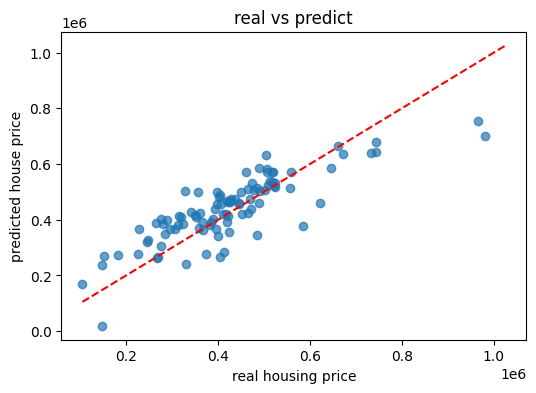

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred, alpha=0.7)
plt.xlabel("real housing price")
plt.ylabel("predicted house price")
plt.title("real vs predict")
plt.plot([y.min(),y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## Residual Analysis

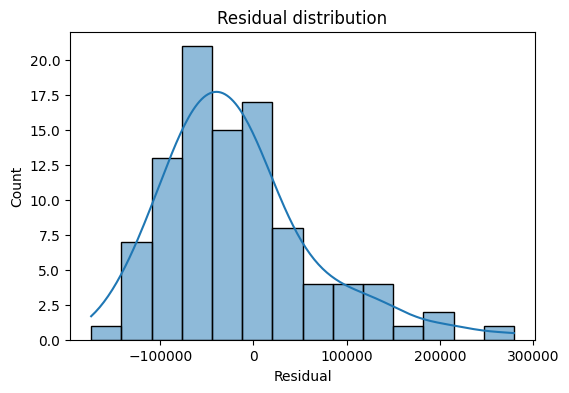

In [24]:
residuals = y_test - y_pred
plt.figure(figsize =(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual distribution")
plt.xlabel("Residual")
plt.show()

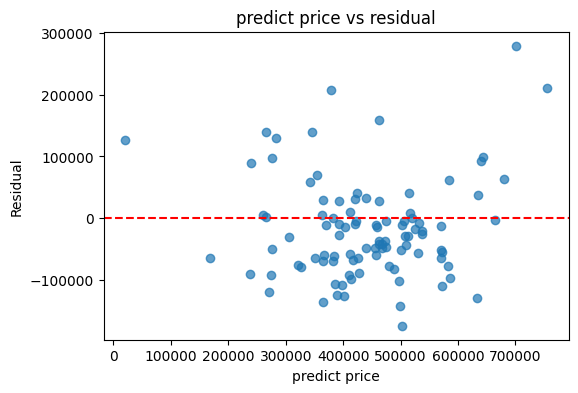

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel("predict price")
plt.ylabel('Residual')
plt.title("predict price vs residual")
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Cross validation

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf, scoring='r2')
print('cross R^2 score: ',cv_scores)
print("average R^2: ",np.mean(cv_scores))

cross R^2 score:  [0.67125996 0.68424571 0.65651685 0.81745874 0.73705352]
average R^2:  0.7133069554520022


## expansion and Ridge compare

In [32]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
r2_ridge = r2_score(y_test,y_pred)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Model Parameters:")
print(f"R^2: {r2_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")

Ridge Model Parameters:
R^2: 0.6911
MSE: 8170612056.9268
